<a href="https://colab.research.google.com/github/LatiefDataVisionary/deep-learning-college-task/blob/main/week_2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sumber Kode**: https://www.kaggle.com/code/soumyadeepp/face-emotion-recognition/notebook

# **1. Pernyataan Masalah (Problem Statement)**

**Pengantar Proyek:**

Dalam dekade terakhir, lanskap pendidikan di India telah mengalami transformasi signifikan, didorong oleh kemajuan dalam layanan pembelajaran berbasis web, terutama platform eLearning.

Diperkirakan pasar eLearning global akan tumbuh delapan kali lipat dalam lima tahun ke depan, mencapai USD 2 miliar pada tahun 2021. India sendiri diproyeksikan tumbuh dengan CAGR sebesar 44%, melampaui 10 juta pengguna pada tahun 2021. Meskipun pasar berkembang pesat, ada tantangan besar dalam pembelajaran digital dibandingkan dengan ruang kelas tradisional. Salah satu tantangan utama adalah memastikan kualitas pembelajaran bagi siswa. Platform digital mungkin unggul dalam kualitas konten, tetapi memahami apakah siswa benar-benar memahami materi dalam skenario kelas langsung masih menjadi masalah yang belum terpecahkan.

Di ruang kelas fisik, seorang guru dapat mengamati ekspresi wajah siswa untuk menilai emosi mereka dan menyesuaikan kecepatan atau gaya mengajar mereka. Guru dapat mengidentifikasi siswa yang membutuhkan perhatian lebih. Namun, kelas digital yang dilakukan melalui platform videotelefoni (seperti Zoom) menyulitkan guru untuk memantau semua siswa dalam kelas berukuran sedang (25-50 siswa) dan menilai suasana hati mereka. Kekurangan ini dapat menyebabkan siswa kurang fokus pada konten karena kurangnya pengawasan.

Meskipun platform digital memiliki keterbatasan dalam pengawasan fisik, mereka menawarkan kekuatan data dan mesin yang dapat dimanfaatkan. Platform ini menghasilkan data dalam bentuk video, audio, dan teks yang dapat dianalisis menggunakan algoritma deep learning. Sistem berbasis deep learning tidak hanya mengatasi masalah pengawasan, tetapi juga menghilangkan bias manusia dan mengubah informasi yang sebelumnya hanya ada di benak guru menjadi data terukur yang dapat dianalisis dan dilacak.

Kami akan mengatasi tantangan ini dengan menerapkan algoritma deep learning pada data video langsung. Solusi yang diusulkan adalah melalui pengenalan emosi wajah.

## Pengenalan Emosi Wajah

Proyek ini bertujuan untuk membangun sistem deteksi emosi wajah langsung dengan pelatihan minimal. Model yang dikembangkan harus mampu mengidentifikasi emosi siswa secara real-time selama sesi kelas langsung.

In [ ]:
# Mengimpor library penting

# Library untuk manipulasi data dan visualisasi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Library Deep Learning
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Library untuk visualisasi model
from tensorflow.keras.utils import plot_model

# Library untuk callback saat pelatihan model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Displaying Images


In [ ]:
# Mengambil input gambar untuk pelatihan
picture_size = 48
folder_path = "/content/drive/MyDrive/Dataset/Face expression recognition dataset/images/"

**Penjelasan Singkat Kode:**

Kode di atas mendefinisikan ukuran gambar yang akan digunakan untuk pelatihan (`picture_size`) dan menentukan lokasi folder tempat dataset gambar ekspresi wajah disimpan (`folder_path`). Variabel-variabel ini akan digunakan pada langkah selanjutnya untuk memuat dan memproses data gambar.

Daftar ekspresi wajah yang ditemukan:
['neutral', 'fear', 'angry', 'surprise', 'happy', 'sad', 'disgust']

Menampilkan contoh gambar untuk ekspresi: neutral


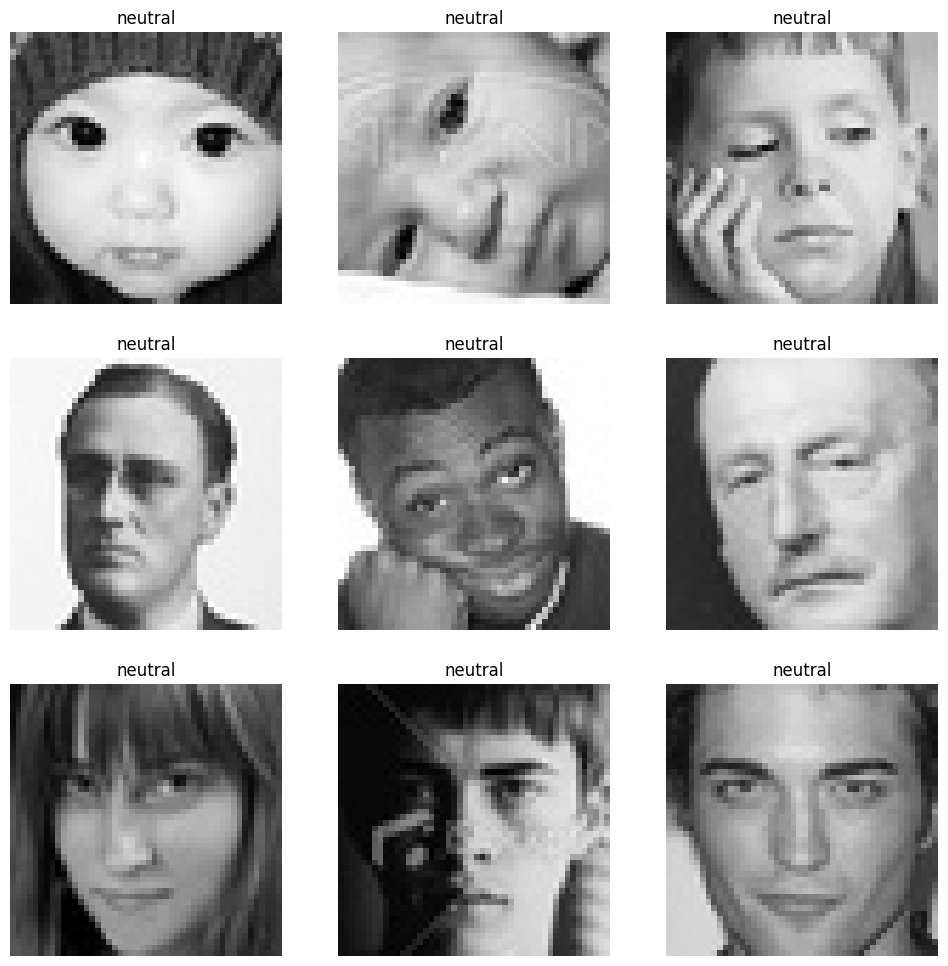


Menampilkan contoh gambar untuk ekspresi: fear


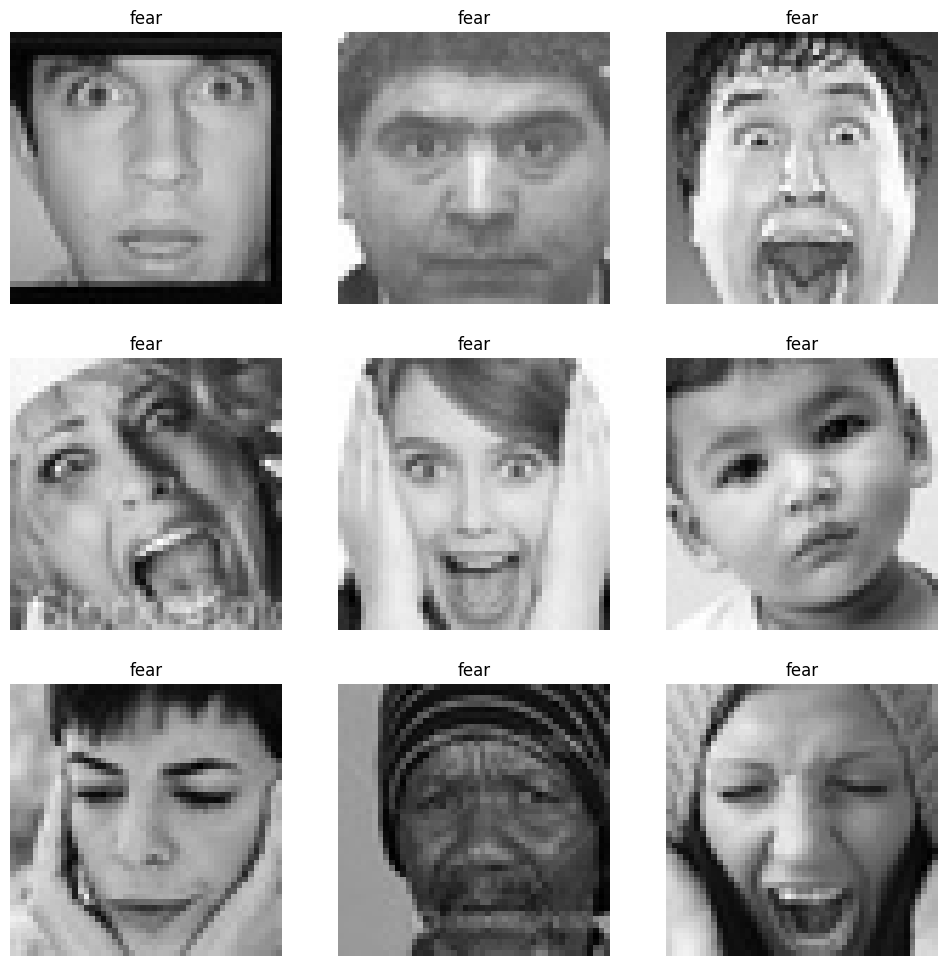


Menampilkan contoh gambar untuk ekspresi: angry


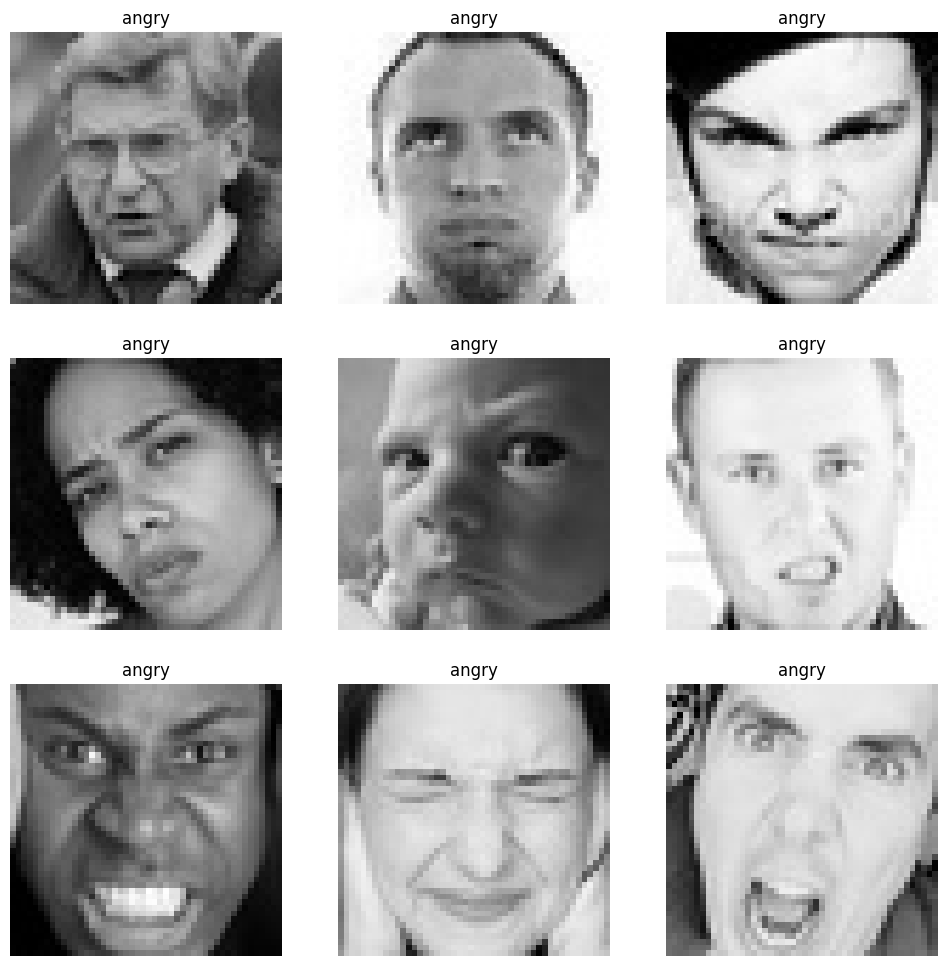


Menampilkan contoh gambar untuk ekspresi: surprise


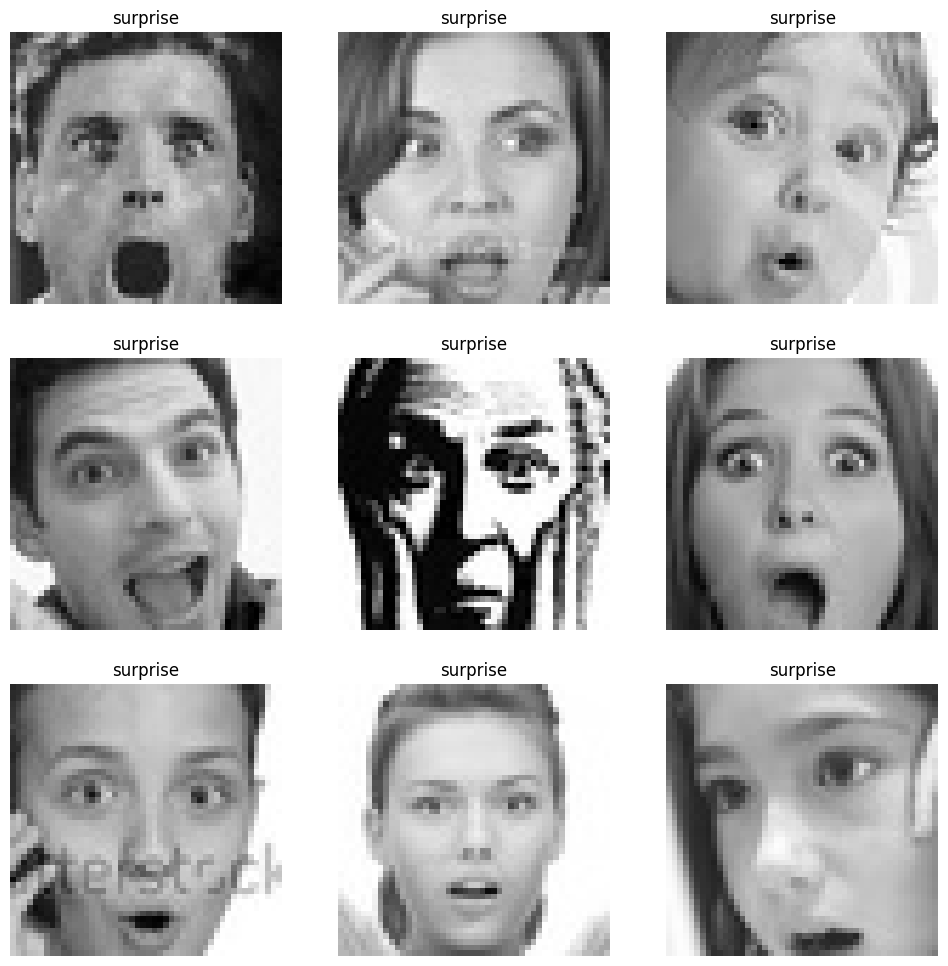


Menampilkan contoh gambar untuk ekspresi: happy


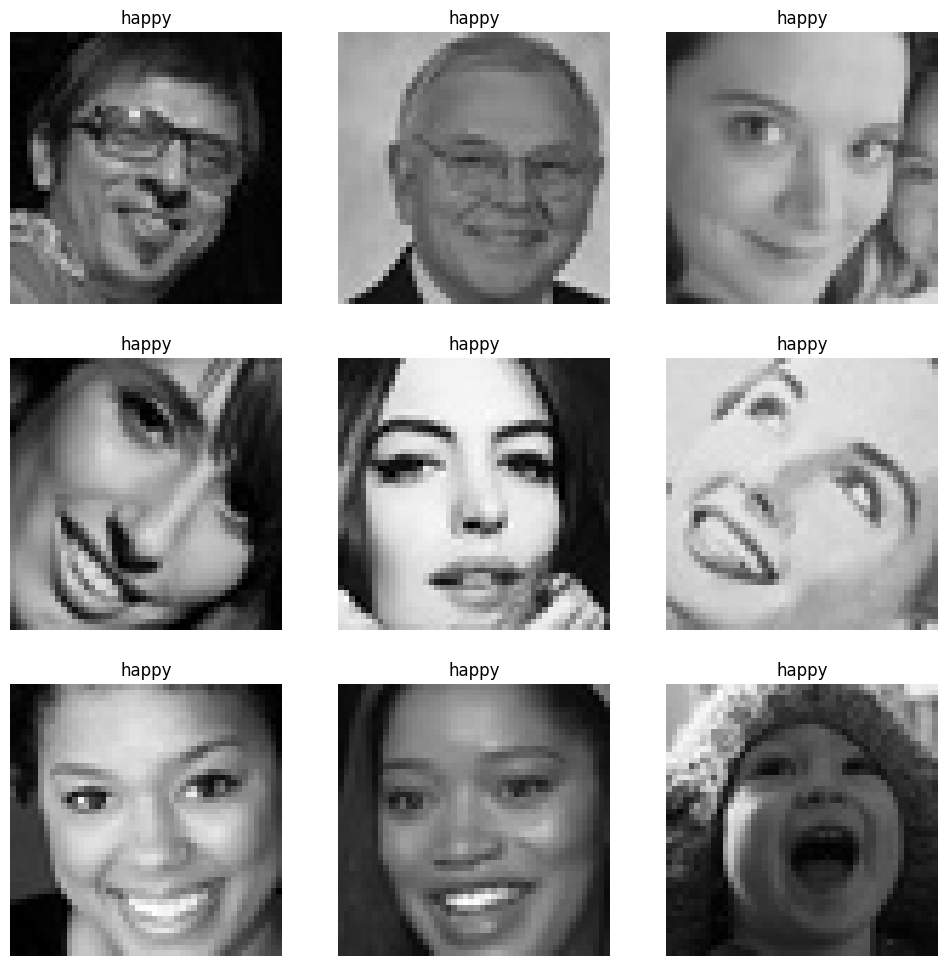


Menampilkan contoh gambar untuk ekspresi: sad


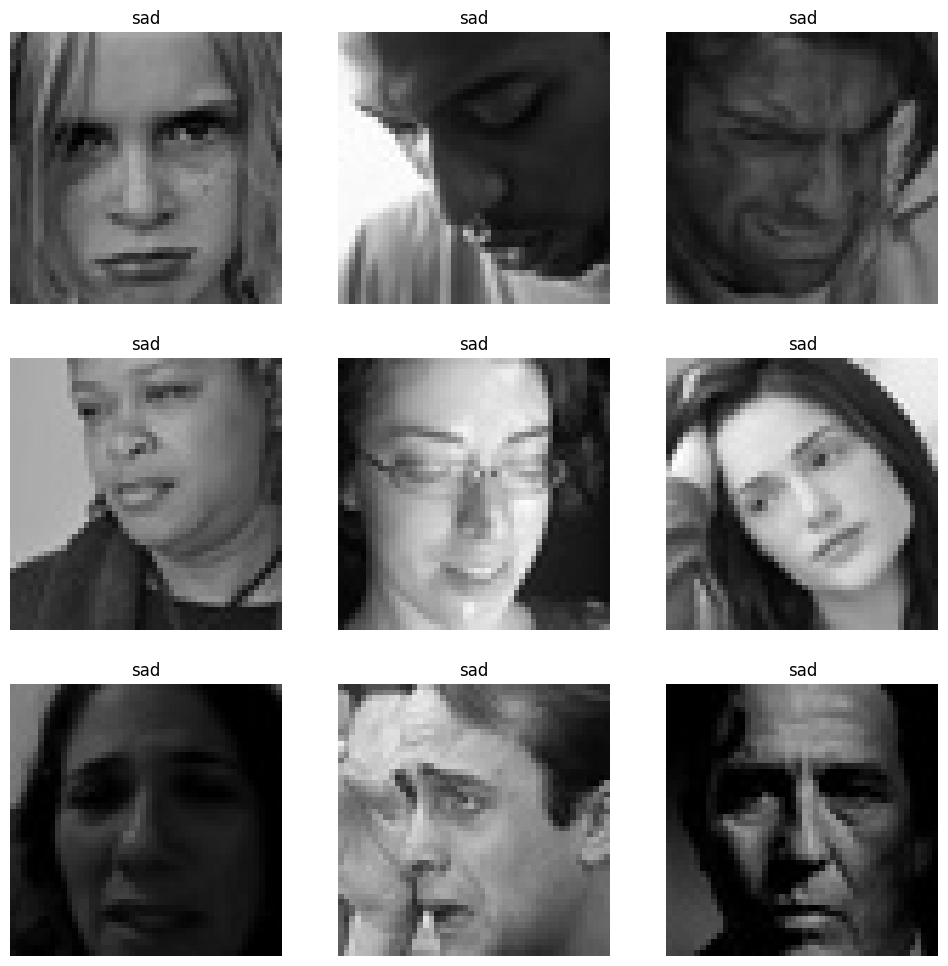


Menampilkan contoh gambar untuk ekspresi: disgust


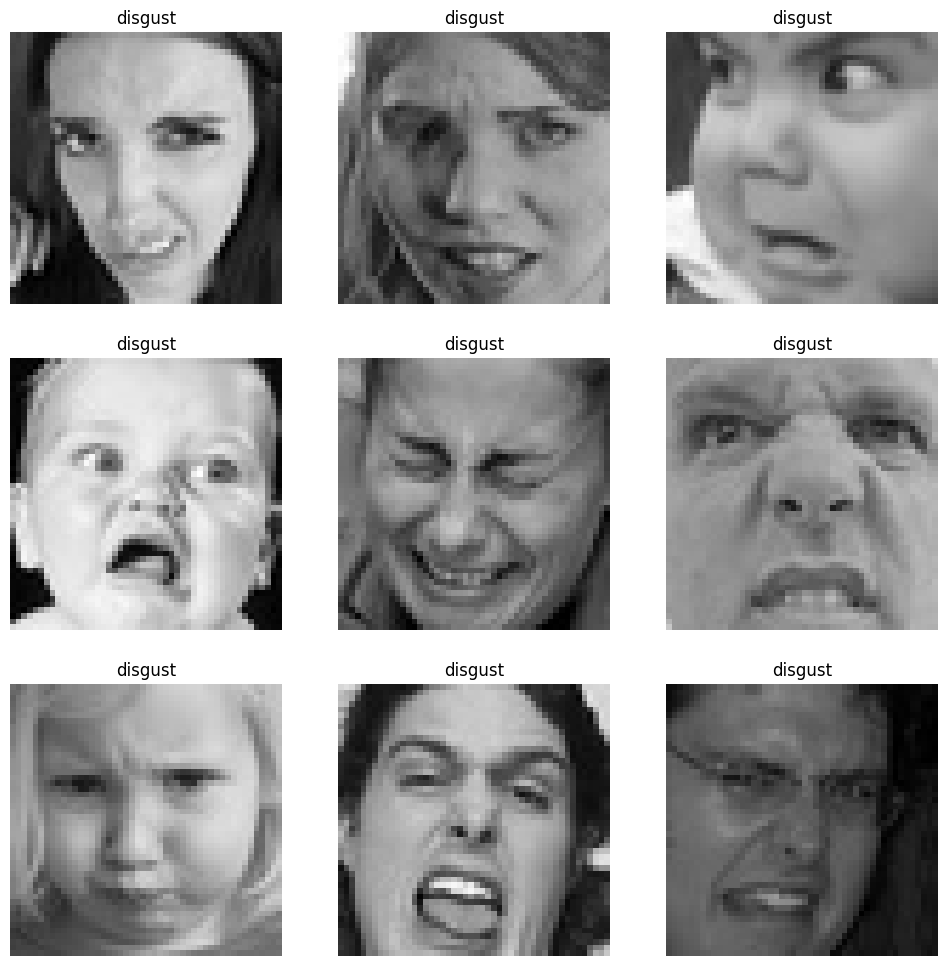

In [ ]:
# Mendapatkan daftar semua folder ekspresi wajah di dalam folder train
expressions = os.listdir(folder_path + "train/")

# Menampilkan daftar ekspresi wajah yang ditemukan
print("Daftar ekspresi wajah yang ditemukan:")
print(expressions)

# Loop melalui setiap ekspresi dan tampilkan contoh gambar
for expression in expressions:
    print(f"\nMenampilkan contoh gambar untuk ekspresi: {expression}")
    plt.figure(figsize= (12,12))
    # Mengambil 9 gambar pertama dari setiap folder ekspresi (jika ada)
    num_images_to_display = min(9, len(os.listdir(folder_path + "train/" + expression)))
    for i in range(num_images_to_display):
        plt.subplot(3,3,i+1)
        img = load_img(folder_path + "train/" + expression + "/" +
                      os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
        plt.imshow(img, cmap='gray') # Menggunakan cmap='gray' karena gambar grayscale
        plt.title(expression) # Menambahkan judul ekspresi pada setiap gambar
        plt.axis('off') # Menyembunyikan axis
    plt.show()

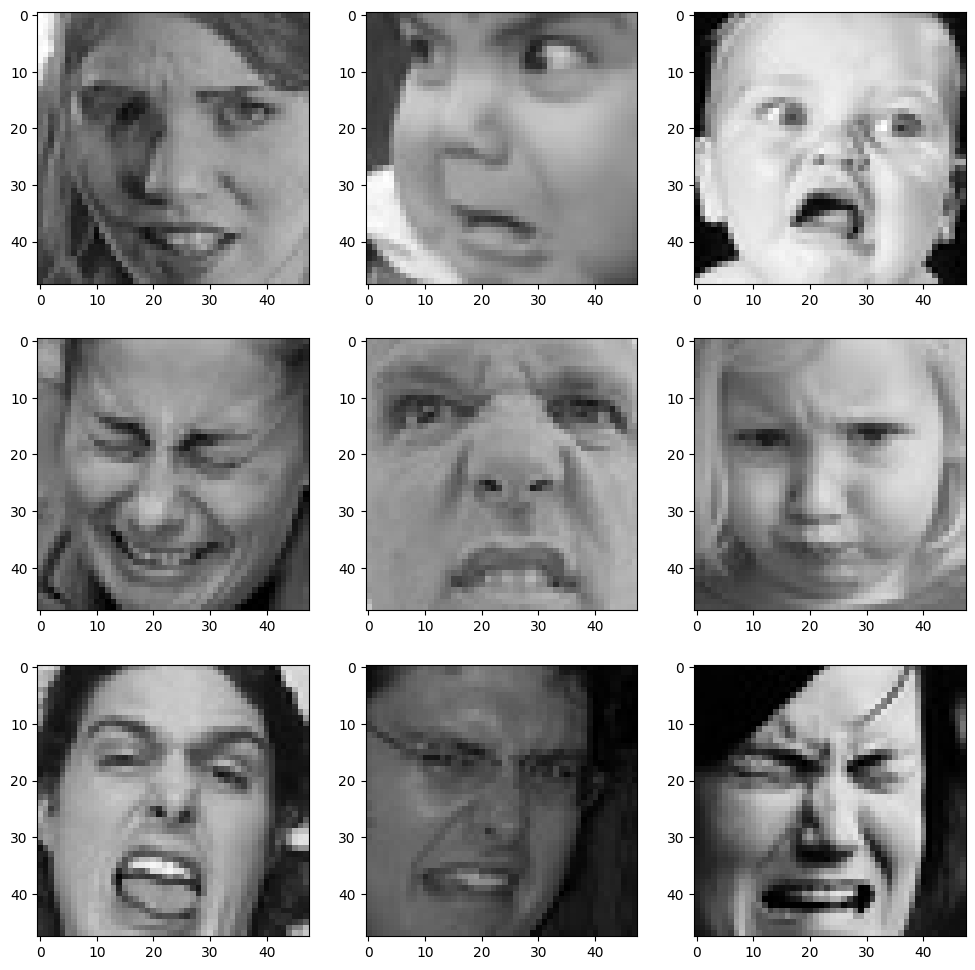

In [ ]:
#checking disgust image
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data


In [ ]:
#splitting data into train, test and validation set
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building


# Bangun Model

*   **Model = sequential**: Model Sequential adalah pilihan yang tepat untuk susunan layer yang sederhana, di mana setiap layer memiliki tepat satu input tensor dan satu output tensor. Jadi, lapisan-lapisan model ini disusun secara berurutan, satu setelah yang lain.

*   **Activation = relu**: Fungsi aktivasi Rectified Linear (atau disingkat ReLU) adalah fungsi linear piecewise yang akan mengeluarkan nilai input secara langsung jika positif, jika tidak, ia akan mengeluarkan nol. Fungsi ini menjadi fungsi aktivasi default untuk banyak jenis jaringan saraf karena model yang menggunakannya lebih mudah dilatih dan seringkali mencapai kinerja yang lebih baik. Ini seperti saklar yang hanya menyala (mengaktifkan neuron) jika inputnya cukup kuat.

*   **padding = 'same'**: Parameter padding pada kelas Conv2D Keras dapat bernilai 'valid' atau 'same'. Mengatur nilainya menjadi "valid" berarti volume input tidak diberi zero-padding, dan dimensi spasial dibiarkan berkurang melalui penerapan konvolusi secara alami. Mengatur nilainya menjadi "same" berarti input diberi zero-padding sehingga ukuran output spasial sama dengan input. Dalam kasus ini, 'same' digunakan untuk menjaga ukuran gambar setelah operasi konvolusi.

*   **Maxpooling = Maximum pooling**: Maximum pooling, atau max pooling, adalah operasi pooling yang menghitung nilai maksimum, atau terbesar, di setiap patch (bagian kecil) dari setiap peta fitur. Hasilnya adalah peta fitur yang diperkecil atau di-pool yang menyoroti fitur yang paling dominan di dalam patch, bukan rata-rata kehadiran fitur seperti pada average pooling. Ini membantu mengurangi dimensi data dan mempertahankan informasi yang paling penting.

*   **Batch normalization = Batch normalization**: Normalisasi batch adalah teknik untuk melatih jaringan saraf dalam yang sangat dalam yang menstandarisasi input ke sebuah layer untuk setiap mini-batch. Ini memiliki efek menstabilkan proses pembelajaran dan secara dramatis mengurangi jumlah epoch pelatihan yang diperlukan untuk melatih jaringan dalam. Ini membantu mempercepat pelatihan dan meningkatkan kinerja model.

*   **Dropout = Dropout**: Dropout adalah teknik yang digunakan untuk mencegah model dari overfitting (terlalu cocok dengan data pelatihan sehingga tidak bekerja baik pada data baru). Dropout bekerja dengan secara acak mengatur edge (koneksi) yang keluar dari unit tersembunyi (neuron yang membentuk layer tersembunyi) menjadi 0 pada setiap update selama fase pelatihan. Ini seperti membuat beberapa neuron "mati" sementara selama pelatihan untuk memaksa model mempelajari fitur yang lebih kuat dan tidak terlalu bergantung pada neuron tertentu.

*   **Adam = Adam**: Adam dapat dilihat sebagai kombinasi dari RMSprop dan Stochastic Gradient Descent dengan momentum. Ini menggunakan gradien kuadrat untuk menyesuaikan learning rate seperti RMSprop dan memanfaatkan momentum dengan menggunakan rata-rata bergerak dari gradien alih-alih gradien itu sendiri seperti SGD dengan momentum. Ini adalah optimizer yang populer dan efektif.

*   **SGD = Stochastic Gradient Descent (SGD)**: Stochastic Gradient Descent (SGD) mengatasi masalah (komputasi yang mahal untuk seluruh dataset) dengan mengikuti gradien negatif dari fungsi tujuan setelah melihat hanya satu atau beberapa contoh pelatihan. Penggunaan SGD dalam pengaturan jaringan saraf dimotivasi oleh biaya tinggi untuk menjalankan back propagation di seluruh set pelatihan. Ini adalah optimizer yang lebih sederhana dibandingkan Adam.

*   **RMSprop = RMSprop**: RMSprop adalah teknik optimasi berbasis gradien yang digunakan dalam melatih jaringan saraf. Normalisasi ini menyeimbangkan ukuran langkah (momentum), mengurangi langkah untuk gradien besar untuk menghindari ledakan (exploding gradients), dan meningkatkan langkah untuk gradien kecil untuk menghindari menghilang (vanishing gradients). Ini membantu dalam mengelola learning rate secara adaptif.

In [ ]:
#building model with 7 classes
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

# Visualisasi Model

Fungsi `plot_model()` di Keras akan membuat gambar visual dari arsitektur jaringan saraf Anda. Fungsi ini memiliki beberapa argumen yang berguna:

*   `model`: (wajib) Model yang ingin Anda visualisasikan.
*   `to_file`: (wajib) Nama file tempat gambar visual akan disimpan.
*   `show_shapes`: (opsional, defaultnya False) Menampilkan atau tidak bentuk output dari setiap layer.
*   `show_layer_names`: (opsional, defaultnya True) Menampilkan atau tidak nama dari setiap layer.

Ini membantu Anda melihat struktur model Anda secara grafis.

In [ ]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


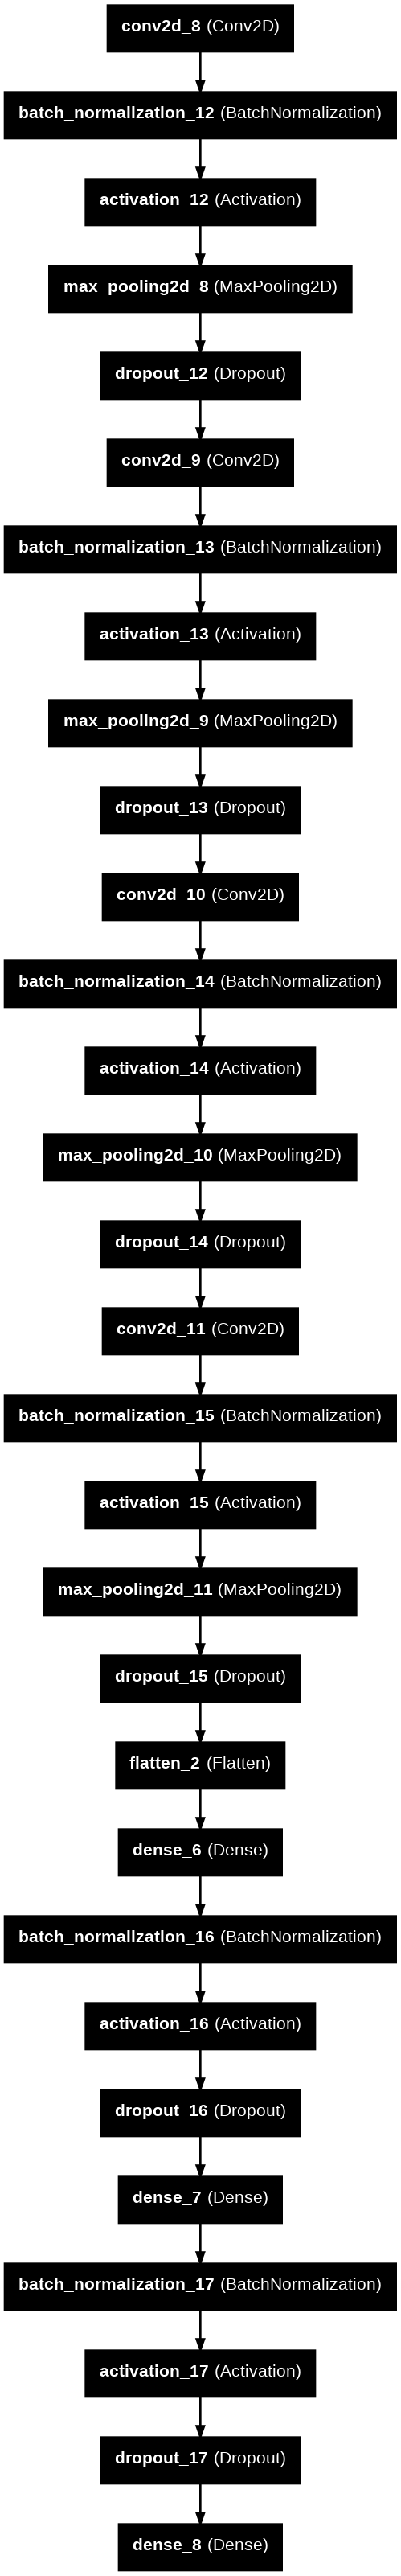

In [ ]:
#visualizing the model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

# Fitting the Model with Training and Validation Data

Bagian ini adalah tentang cara model Anda "belajar" dari data yang Anda berikan.

*   `checkpoint`: Ini seperti menyimpan catatan terbaik dari model saat sedang belajar. Jika model mencapai performa terbaik (dalam hal akurasi validasi), catatan ini akan disimpan di file "model.h5".
*   `early_stopping`: Ini seperti seorang guru yang menghentikan proses belajar jika model sudah tidak menunjukkan peningkatan lagi pada data validasi (berdasarkan "loss"). Ini mencegah model dari terlalu "menghafal" data pelatihan.
*   `reduce_learningrate`: Ini akan mengurangi kecepatan belajar model jika performanya pada data validasi tidak membaik setelah beberapa kali percobaan. Ini membantu model menemukan titik terbaik dengan lebih halus.
*   `callbacks_list`: Ini adalah daftar semua "aturan" (checkpoint, early stopping, reduce learning rate) yang akan diikuti selama proses belajar model.
*   `epochs`: Ini adalah berapa kali model akan melihat seluruh data pelatihan. Di sini diatur sebanyak 50 kali.
*   `model.compile`: Ini adalah langkah di mana Anda memberitahu model bagaimana cara belajar.
    *   `loss='categorical_crossentropy'`: Ini adalah cara model mengukur seberapa salah prediksinya dibandingkan jawaban yang benar untuk masalah klasifikasi seperti ini.
    *   `optimizer = Adam(learning_rate=0.001)`: Ini adalah "strategi" yang digunakan model untuk menyesuaikan bobotnya agar loss menjadi minimal. Adam adalah salah satu strategi yang umum dan efektif.
    *   `metrics=['accuracy']`: Ini adalah apa yang akan diukur selama proses belajar untuk melihat seberapa bagus performa model (dalam hal seberapa sering model memprediksi dengan benar).

In [ ]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Melatih Model dengan Data Pelatihan dan Validasi

Kode ini adalah langkah di mana model yang sudah kita bangun akan mulai "belajar" dari data pelatihan.

*   `history = model.fit(...)`: Ini adalah fungsi utama untuk memulai proses pelatihan. Hasil dari pelatihan (seperti nilai loss dan akurasi di setiap epoch) akan disimpan dalam variabel `history`.
*   `train_set`: Ini adalah data yang akan digunakan model untuk belajar. Model akan melihat data ini berulang kali untuk menyesuaikan bobotnya.
*   `steps_per_epoch=train_set.n//train_set.batch_size`: Ini menentukan berapa banyak langkah (batch data) yang akan diproses dalam satu epoch pelatihan. `train_set.n` adalah jumlah total gambar dalam data pelatihan, dan `train_set.batch_size` adalah ukuran batch (jumlah gambar yang diproses sekaligus). Jadi, ini menghitung jumlah batch yang dibutuhkan untuk melihat seluruh data pelatihan satu kali.
*   `epochs=epochs`: Ini menentukan berapa kali model akan melihat seluruh data pelatihan. Variabel `epochs` sebelumnya sudah diatur menjadi 50.
*   `validation_data = test_set`: Ini adalah data yang akan digunakan untuk memvalidasi performa model setelah setiap epoch. Model tidak belajar dari data ini, hanya menggunakannya untuk melihat seberapa baik performanya pada data yang belum pernah dilihat sebelumnya.
*   `validation_steps = test_set.n//test_set.batch_size`: Mirip dengan `steps_per_epoch`, ini menentukan berapa banyak langkah validasi yang akan dilakukan dalam satu epoch.
*   `callbacks=callbacks_list`: Ini adalah daftar "aturan" atau fungsi tambahan yang akan dijalankan selama pelatihan, seperti menyimpan model terbaik (`checkpoint`), menghentikan pelatihan lebih awal jika tidak ada peningkatan (`early_stopping`), dan mengurangi learning rate (`reduce_learningrate`).

Secara singkat, kode ini memberitahu model untuk berlatih menggunakan `train_set` selama 50 epoch, memvalidasi performanya menggunakan `test_set` setelah setiap epoch, dan mengikuti aturan yang sudah ditentukan dalam `callbacks_list`. Variabel `history` akan menyimpan catatan kemajuan pelatihan.

In [ ]:
#fitting model with 48 epoch
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 32s/step - accuracy: 0.2694 - loss: 1.9277 

KeyboardInterrupt: 

# Plotting Accuracy & Loss

Kode ini bertujuan untuk membuat grafik yang menunjukkan bagaimana performa model berubah selama proses pelatihan, baik dari sisi akurasi maupun nilai *loss* (kesalahan).

*   `plt.style.use('dark_background')`: Ini mengatur gaya plot menggunakan latar belakang gelap agar lebih mudah dilihat.
*   `plt.figure(figsize=(20,10))`: Ini membuat sebuah "kanvas" atau area untuk menggambar plot dengan ukuran 20x10 inci.
*   `plt.subplot(1, 2, 1)`: Ini membagi kanvas menjadi 1 baris dan 2 kolom, lalu memilih area pertama (kiri) untuk plot pertama.
*   `plt.suptitle('Optimizer : Adam', fontsize=10)`: Ini memberikan judul utama pada seluruh gambar plot.
*   `plt.ylabel('Loss', fontsize=16)`: Ini memberi label pada sumbu Y untuk plot pertama dengan teks "Loss" dan ukuran font 16.
*   `plt.plot(history.history['loss'], label='Training Loss')`: Ini menggambar garis untuk nilai *loss* pada data pelatihan di setiap epoch. Data diambil dari variabel `history` yang menyimpan hasil pelatihan.
*   `plt.plot(history.history['val_loss'], label='Validation Loss')`: Ini menggambar garis untuk nilai *loss* pada data validasi di setiap epoch.
*   `plt.legend(loc='upper right')`: Ini menampilkan legenda (keterangan garis) di sudut kanan atas plot pertama.
*   `plt.subplot(1, 2, 2)`: Ini memilih area kedua (kanan) pada kanvas untuk plot kedua.
*   `plt.ylabel('Accuracy', fontsize=16)`: Ini memberi label pada sumbu Y untuk plot kedua dengan teks "Accuracy" dan ukuran font 16.
*   `plt.plot(history.history['accuracy'], label='Training Accuracy')`: Ini menggambar garis untuk nilai akurasi pada data pelatihan di setiap epoch.
*   `plt.plot(history.history['val_accuracy'], label='Validation Accuracy')`: Ini menggambar garis untuk nilai akurasi pada data validasi di setiap epoch.
*   `plt.legend(loc='lower right')`: Ini menampilkan legenda di sudut kanan bawah plot kedua.
*   `plt.show()`: Ini menampilkan semua plot yang sudah dibuat.

Secara keseluruhan, kode ini memvisualisasikan bagaimana nilai *loss* dan akurasi model berubah selama pelatihan untuk data pelatihan dan data validasi, sehingga kita bisa melihat apakah model belajar dengan baik atau mengalami *overfitting*.

NameError: name 'history' is not defined

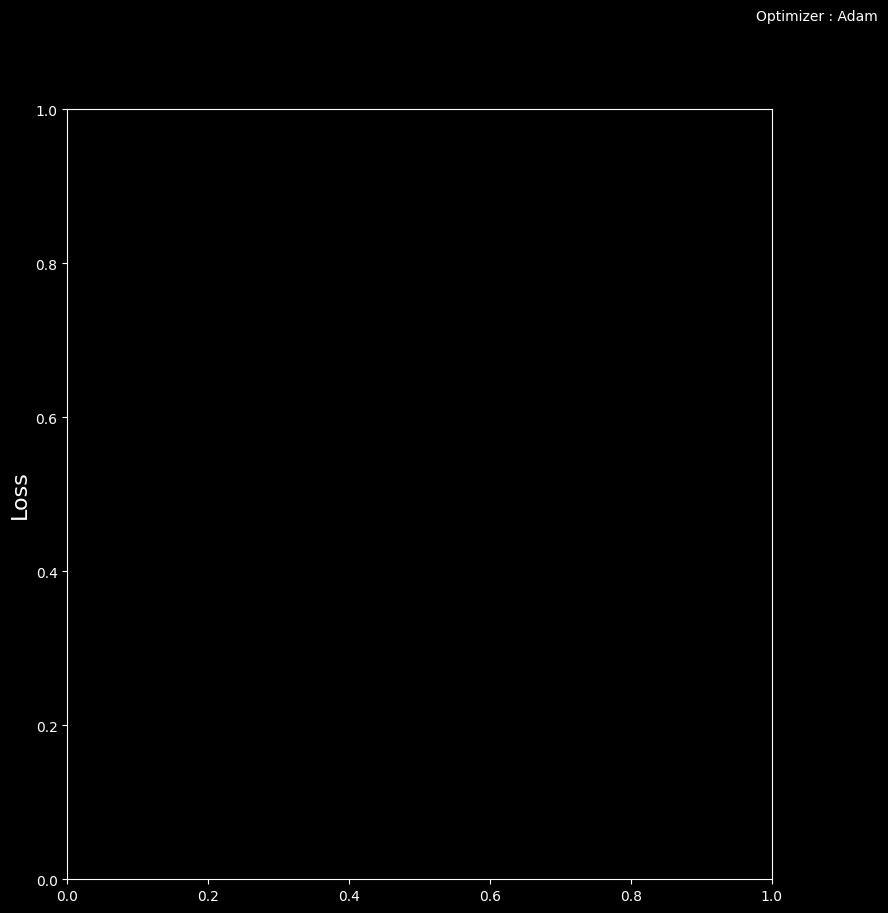

In [ ]:
#plotting graph to check accuracy and loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

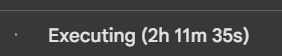

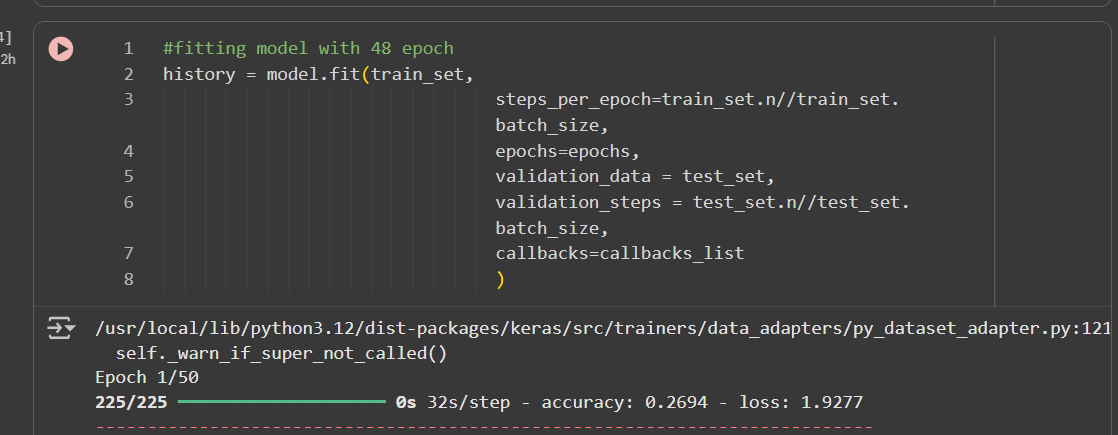